In [84]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as  s
print s.__version__
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification as makec
import Foresight as Fsht
#allow realtime editing of the class 
reload(Fsht)
Foresight = Fsht.Foresight

0.19.0


## Test dataset description

We make use of `sklearn.datasets.make_classification` method to create classification dataset to provide testing.

A sample call to it is as follows:
    
    make_classification(n_samples, n_features, n_informative, n_redundant, n_repeated, n_classes,...)
    
    n_samples : int, optional (default=100)
    The number of samples.
    n_features : int, optional (default=20)
    The total number of features. These comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and n_features-n_informative-n_redundant- n_repeated useless features drawn at random.
    n_informative : int, optional (default=2)
    The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.
    n_redundant : int, optional (default=2)
    The number of redundant features. These features are generated as random linear combinations of the informative features.
    n_repeated : int, optional (default=0)
    The number of duplicated features, drawn randomly from the informative and the redundant features.
    n_classes : int, optional (default=2)
    The number of classes (or labels) of the classification problem.
    n_clusters_per_class : int, optional (default=2)
    The number of clusters per class.


In [85]:
Xd1,yd1 = makec(n_samples=10000, n_features=50, n_informative=4, n_redundant=0, 
                n_repeated=1, n_classes=4)
#Xd1,yd1 = makec(2500, 20, 2, 18, n_classes=2)

### First dataset

Frequency analysis on the outputted best feature sets. 

In [86]:
fsd1 = Foresight(Xd1, yd1)
fsd1.fit()

In [87]:
for i, fxy in  enumerate(fsd1.mi_features_y):
    print i, fxy

0 0.00699829541991
1 0.0
2 0.00392880281873
3 0.00912806369232
4 0.0
5 0.0
6 0.0
7 0.0
8 0.00444736758086
9 0.0
10 0.0
11 0.00193749251004
12 0.0
13 0.110864994766
14 0.0451976161828
15 0.0
16 0.0
17 0.000373420622079
18 0.0
19 0.00140909894599
20 0.262318337153
21 0.0072435236593
22 0.000569951767892
23 0.0013293026445
24 0.00378937971568
25 0.0
26 0.00839360681
27 0.0
28 0.0
29 0.0
30 0.0
31 0.00882858050048
32 0.00251302860832
33 0.125245797754
34 0.00579993273867
35 0.00661395617639
36 0.262318337153
37 0.0
38 0.00154537870791
39 0.000379274644704
40 0.0067555935641
41 0.0143225198407
42 0.00581495068859
43 0.000296693504788
44 0.00284722749485
45 0.0
46 0.0
47 0.0
48 0.0
49 0.00797461475069


In [88]:
Nfeats = 3
N=1000
sel_feats = np.zeros((N, Nfeats))
for i in range(N):
    sel_feats[i] = fsd1.select_n_features(Nfeats)


Foresight.py:167: RuntimeWarning: divide by zero encountered in divide
  wgts = 1. / self.mi_features[final_features[-1], get_a_heap_of_features]
Foresight.py:168: RuntimeWarning: invalid value encountered in divide
  wgts /= np.sum(wgts)
Foresight.py:170: RuntimeWarning: invalid value encountered in less
  final_features.append(np.random.choice(get_a_heap_of_features, size=1, p=wgts)[0])


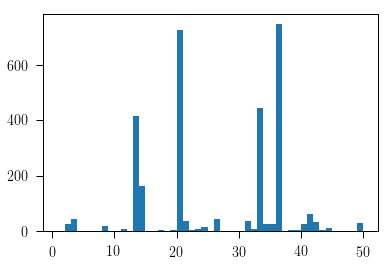

In [89]:
_ = plt.hist(np.ravel(sel_feats),bins=np.arange(len(fsd1.mi_features_y))+1)

In [90]:
print fsd1.mi_features

[[        nan         nan  0.00575321 ...,         nan         nan  0.        ]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [ 0.00401661         nan         nan ...,         nan         nan  0.        ]
 ..., 
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [ 0.00437612         nan  0.         ...,         nan         nan
          nan]]


## Second dataset

In [ ]:
fsd2 = Foresight(Xd2,yd2)
fsd2.fit()

In [ ]:
ret2 = []
for k in range(1,21):
    re = []
    failcount2 = 0
    for i in xrange(1000):
        try:
            far = fsd2.select_n_features(k)
            re.append(np.array(far))
        except ValueError,e:
            failcount2 = failcount2 + 1
            # print "Couldn't do it: %s" % e
    print 'The failcount for {0} iteration is {1}'.format(k,failcount2)
    ret2.append([np.unique(re,return_counts=True)])

In [ ]:
ret2

In [ ]:
fsd2.mi_features_y

In [ ]:
for x in ret2:
    print x[0][1]


In [ ]:
plt.figure(figsize=(20,10))
for i,x in enumerate(ret2):
    plt.plot(x[0][0],x[0][1],label=str(i+1))
plt.xlabel('Feature ID(Zero based)')
plt.ylabel('Frequency')
plt.xticks(np.arange(20))
plt.title('Frequency analysis')
plt.grid(True)
plt.legend(loc='best')
plt.show()